[View in Colaboratory](https://colab.research.google.com/github/endyleon/pruebaSplit/blob/recording/RecordingRadioStreamMusicColab.ipynb)

In [0]:
#!pip install pydub
!apt install ffmpeg
!pip install librosa
!pip install ipython




In [0]:
import requests
import time
import IPython.display as ipd
#import pydub
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as waves
import librosa.display 

import os
#from progressbar import ProgressBar

from google.colab import files

#!git clone https://github.com/endyleon/pruebaSplit.git

In [0]:
stream_url = 'http://streaming.hotmixradio.fr/hotmixradio-hits-128.mp3'

In [0]:
##Acá debes dejarlo grabando durante un rato

r = requests.get(stream_url, stream = True)
time_text = time.strftime('%y%m%d_%H%M%S')
time_text
audio_name = 'stream'+time_text
with open (audio_name+'.mp3', 'wb') as f:
  try:
    for block in r.iter_content(1024):
      f.write(block)
  except KeyboardInterrupt:
    pass

In [0]:
#muestra = pydub.AudioSegment.from_mp3(audio_name+'.mp3')
#muestra.export(audio_name+'.wav', format = 'wav')
#rate, audData = waves.read(audio_name+'.wav')

#print(rate)
#files.download(audio_name)

In [37]:
ls

parte01.wav   sample_data/             stream180919_140205.wav
pruebaSplit/  stream180919_140205.mp3


In [0]:
#Por ahora se usa el nombre listado en la celda de arriba
x, sr = librosa.load('stream180919_140205.mp3')

In [0]:
print (x)
print (sr.shape)

In [0]:
plt.figure(figsize = (18, 5))

#Esto funcionaba bien y me está mostrando error, así que no visualiza
librosa.display.waveplot(x, sr=sr)

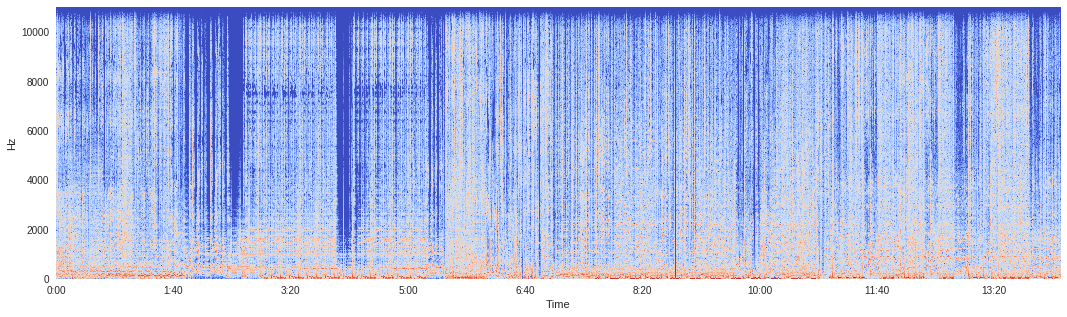

In [32]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(18, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis = 'time', y_axis='hz')

In [11]:
librosa.effects.split(x, top_db=60, frame_length=2048, hop_length=512)
#librosa.core.get_duration(y=None, sr=sr, S=librosa.stft(x), n_fft=2048, hop_length=512, center=True, filename=None)

array([[     512,  8112128],
       [ 8112640,  9099264],
       [ 9100800, 18890496]])

In [28]:
librosa.effects.split(x, top_db=93, frame_length=2048, hop_length=512)

array([[       0,  9099264],
       [ 9100800, 18890496]])

In [0]:
ipd.Audio('stream180919_140205.mp3')